Start with:
Data Check
Data cleansing
Verification that everything is proper

Analysis to do:
Country Analysis - Which country uses the most. BY $ amount and quantity
Product  Analytics  - Top products per country  
Price Analytics - By Month/Country
What sells the most, What is returned the most
Monthly ratio of successful sold to cancelled
Distribution between cancelled and successful invoice
Analysis of invoice by hourly distribution
Who are our top customers? By unit price, by quantity etc. Understand their needs and if data is skewed because of them eg. Big companies making big orders on a given product. (Might not mean it is favored by everyone). Basically check uniqueness in customer for given product.

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import random
import os
import glob

%matplotlib inline
# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [33]:
ds = pd.read_csv("data_science_analytics_2018_data.csv",dtype=str)
#Save Orignal Data

In [34]:
#convert data into proper format
ds['Quantity'] = pd.to_numeric(ds['Quantity'])
ds['UnitPrice'] = pd.to_numeric(ds['UnitPrice'])
ds['InvoiceDate'] = pd.to_datetime(ds['InvoiceDate'])

In [35]:
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-09-12 11:58:00,1.25,17315,United Kingdom
1,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315,United Kingdom
2,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311,United Kingdom
3,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498,United Kingdom
4,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-09-12 09:57:00,1.95,14397,United Kingdom


In [36]:
cpy =ds

In [37]:
ds.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [38]:
ds.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

In [39]:
ds.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

ds.dropna(axis =0, subset=['CustomerID'],inplace=True)

In [40]:
ds.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [41]:
#Another way to look at data description
#Find how many rows are empty in dataframe
for column in ds.columns:
    print ('#Null objects in column', column, ': ')
    print (len(ds) - ds[column].count(), ' rows - ', (len(ds) - ds[(column)].count())*100.0/len(ds), '% of dataset')
#Thus we see that only Description and CustomerID have missing values.
#Out of which about 25% of customerId is missing. Thus we should be aware while doing any customer analytics on this dataset

#Null objects in column InvoiceNo : 
0  rows -  0.0 % of dataset
#Null objects in column StockCode : 
0  rows -  0.0 % of dataset
#Null objects in column Description : 
1454  rows -  0.268310731138 % of dataset
#Null objects in column Quantity : 
0  rows -  0.0 % of dataset
#Null objects in column InvoiceDate : 
0  rows -  0.0 % of dataset
#Null objects in column UnitPrice : 
0  rows -  0.0 % of dataset
#Null objects in column CustomerID : 
135080  rows -  24.9266943343 % of dataset
#Null objects in column Country : 
0  rows -  0.0 % of dataset


In [56]:
#Lets check business health -
#1 - Checking distribution of cancelled transaction
invoice_total = ds.InvoiceNo.count()
cancellations_count = ds[ds['InvoiceNo'].str.contains("C|c")==True].InvoiceNo.count()
#print cancellations_count
cancellations_percent = cancellations_count*100.00/invoice_total
#print cancellations_percent
non_cancelled_count =  invoice_total - cancellations_count
#print non_cancelled_count
non_cancelled_percent = non_cancelled_count*100.00/invoice_total
#print non_cancelled_percent

In [57]:
#data['StockCode'].value_counts()

In [58]:
#Finding uncancelled orders to find top products for business
uncancelled_orders = ds[ds['InvoiceNo'].str.contains("C|c")==False]
uncancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_total
9288,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,NaN,United Kingdom,-11062.06
9289,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,NaN,United Kingdom,-11062.06
9290,A563185,B,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,NaN,United Kingdom,11062.06
9291,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680,France,14.85
9292,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-09-12 12:50:00,1.95,12680,France,15.60


In [59]:
#Get top n most frequntly purchased SKUs 
sku_count = uncancelled_orders.groupby(by=['StockCode', 'Description'], sort=True)['Description'].count()
sku_count.sort_values(ascending=False).head(10)

StockCode  Description                       
85123A     WHITE HANGING HEART T-LIGHT HOLDER    2260
85099B     JUMBO BAG RED RETROSPOT               2115
22423      REGENCY CAKESTAND 3 TIER              2019
47566      PARTY BUNTING                         1707
20725      LUNCH BAG RED RETROSPOT               1594
84879      ASSORTED COLOUR BIRD ORNAMENT         1489
22720      SET OF 3 CAKE TINS PANTRY DESIGN      1399
21212      PACK OF 72 RETROSPOT CAKE CASES       1370
20727      LUNCH BAG  BLACK SKULL.               1328
22457      NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

By the looks of iniitial analysis this looks like a big e-commerce/brick & mortar business due to wide variety of stocks available.
Looking at this data, we can see what are the top products purchased frequently on client's business

In [60]:
#Get top n most sold SKUs by client's business
sku_qnty_count = uncancelled_orders.groupby(by=['StockCode', 'Description'], sort=True)['Quantity'].sum()
top_sku_count = sku_qnty_count.sort_values(ascending=False)
top_sku_count.head(10)

StockCode  Description                       
23843      PAPER CRAFT , LITTLE BIRDIE           80995
23166      MEDIUM CERAMIC TOP STORAGE JAR        78033
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
85099B     JUMBO BAG RED RETROSPOT               48478
85123A     WHITE HANGING HEART T-LIGHT HOLDER    37603
22197      POPCORN HOLDER                        36761
84879      ASSORTED COLOUR BIRD ORNAMENT         36461
21212      PACK OF 72 RETROSPOT CAKE CASES       36419
23084      RABBIT NIGHT LIGHT                    30788
22492      MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64

Interesting enough to see that the most frequently bought products may not always make it to the list of most ordered item for the business. Thus, if an item is frequently purchased and not present under high_quantity SKU list, it might reflect the item is usually purchased as a single unit. On the contrary, if an item is under high quantity but not frequently purchased, it means these items are usually ordered in qunatities greater than 1.


It might be of interest to look into the top customers who buy the products as they might be our business drivers.
Remeber: Business health can be driven by $ revenue. To get highest $, we need to either find SKU's that are expensive and bought seldomly, SKU's that are inexpensive and bought very frequently or SKU's that are expensive and bought frequently(best case scenario, although unlikely)

In [61]:
sku_qnty_per_customer = uncancelled_orders.groupby(by=['StockCode', 'Description', 'CustomerID'], sort=True)['Quantity'].sum()
sku_qnty_per_customer.sort_values(ascending=False).head(10)

StockCode  Description                        CustomerID
23843      PAPER CRAFT , LITTLE BIRDIE        16446         80995
23166      MEDIUM CERAMIC TOP STORAGE JAR     12346         74215
84826      ASSTD DESIGN 3D PAPER STICKERS     13256         12540
17003      BROCADE RING PURSE                 16422         10080
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS  16333         10080
22197      POPCORN HOLDER                     17949          9292
21915      RED  HARMONICA IN BOX              16333          8120
16014      SMALL CHINESE STYLE SCISSOR        16308          8000
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS  12901          6768
22616      PACK OF 12 LONDON TISSUES          17306          6624
Name: Quantity, dtype: int64

For a company that ships goods, shipping is a major cost attributing to the supply chain. In turn, this data points us to the next step where we would like to see for a given StockCode what is the usual number of items shipped in one order. This metrics shows business health and can help in planning for labor.

In [62]:
units_per_order = uncancelled_orders.groupby(by=['StockCode'], sort=True)['Quantity'].mean()
units_per_order.sort_values(ascending=False).head(20)

StockCode
23843     80995.000000
47556B      957.750000
84826       370.405405
23166       312.132000
16014       246.814815
79063D      211.538462
79062D      202.400000
23001       200.000000
16033       192.000000
22053       151.571429
17084R      149.333333
84077       102.508380
17096        96.038462
18007        95.312500
17003        95.272727
84568        93.797297
84212        92.927928
21897        88.600000
16049        78.142857
37413        74.654762
Name: Quantity, dtype: float64

In [63]:
units_per_order.sort_values(ascending=True).head(20)

StockCode
72140F    -5368.000000
79323W    -4830.000000
79323LP   -2618.000000
72732     -2472.000000
23059     -2376.000000
79323GR   -1158.000000
79342B    -1128.000000
79323P     -999.500000
72038P     -990.000000
79341      -905.000000
79323B     -831.500000
79323S     -674.000000
79323G     -657.000000
72759      -524.000000
22351      -462.333333
35610C     -365.333333
35610A     -316.750000
35610B     -258.500000
84614A     -194.000000
84612B     -162.000000
Name: Quantity, dtype: float64

Since cancelled shipments have already been removed, the negative quantity might reflect other aspects of the business like damaged goods, returns etc.

(array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   5.00000000e+00,
          6.00000000e+00,   4.00000000e+00,   9.00000000e+00,
          1.10000000e+01,   2.50000000e+01,   4.40000000e+01,
          1.23000000e+02,   1.49800000e+03,   1.04000000e+03,
          6.08000000e+02,   2.60000000e+02,   1.22000000e+02,
          7.40000000e+01,   5.70000000e+01,   4.30000000e+01,
          2.90000000e+01,   1.30000000e+01,   6.00000000e+00,
          9.00000000e+00,   4.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

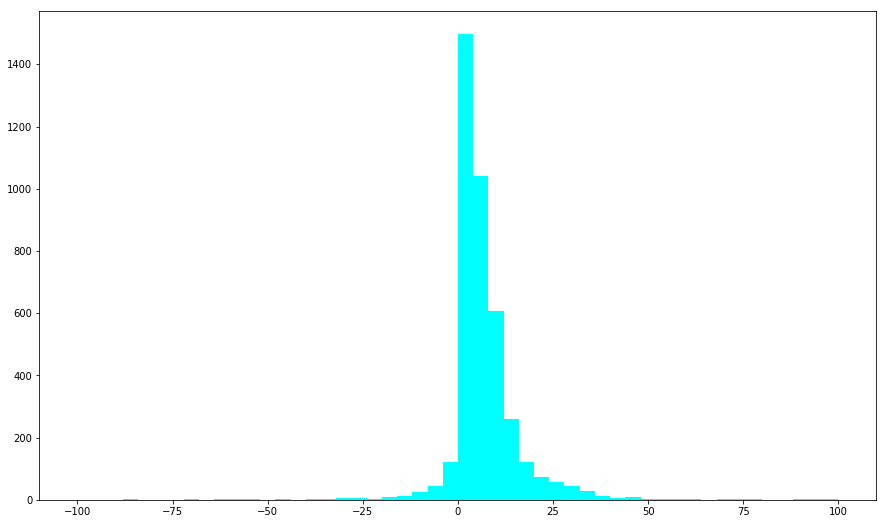

In [64]:
import matplotlib.pyplot as plt
plt.hist(units_per_order, range= (-100,100), bins=50, color ='cyan')

In [42]:
ds_top=ds[ds['InvoiceNo'].str.contains("C|c")==False]
ds_top.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9288,A563187,B,Adjust bad debt,1,2011-12-08 14:52:00,-11062.06,NaN,United Kingdom
9289,A563186,B,Adjust bad debt,1,2011-12-08 14:51:00,-11062.06,NaN,United Kingdom
9290,A563185,B,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,NaN,United Kingdom
9291,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680,France
9292,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-09-12 12:50:00,1.95,12680,France


In [44]:
ds['StockCode'].value_counts().head()

85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
Name: StockCode, dtype: int64

In [45]:
ds_top['StockCode_total'] = ds_top['Quantity'] * ds_top['UnitPrice']

C:\Users\Rahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-09-12 11:58:00,1.25,17315,United Kingdom
1,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315,United Kingdom
2,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311,United Kingdom
3,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498,United Kingdom
4,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-09-12 09:57:00,1.95,14397,United Kingdom


In [47]:
ds_top.groupby(['StockCode'])[["StockCode_total"]].sum().head(10)

,StockCode_total
StockCode,
10002,759.89
10080,119.09
10120,40.53
10123C,3.25
10123G,0.00
10124A,6.72
10124G,7.14
10125,994.84
10133,1544.22


In [48]:
ref = ds_top.sort_values(['StockCode_total'],ascending=[0])

In [49]:
ref

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_total
10771,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-09-12 09:15:00,2.08,16446,United Kingdom,168469.60
481328,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.60
323242,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-10-06 15:28:00,649.50,15098,United Kingdom,38970.00
527069,537632,AMAZONFEE,AMAZON FEE,1,2010-07-12 15:08:00,13541.33,NaN,United Kingdom,13541.33
9290,A563185,B,Adjust bad debt,1,2011-12-08 14:50:00,11062.06,NaN,United Kingdom,11062.06
371728,551697,POST,POSTAGE,1,2011-03-05 13:46:00,8142.75,16029,United Kingdom,8142.75
199841,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450,United Kingdom,7144.72
490156,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-11-01 12:55:00,2.10,15749,United Kingdom,6539.40
384332,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,6539.40
128077,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646,Netherlands,4992.00


In [50]:
ds['StockCode_total'] = ds['Quantity'] * ds['UnitPrice']

In [51]:
ds.groupby(['StockCode'])[["StockCode_total"]].sum().head(10)

,StockCode_total
StockCode,
10002,759.89
10080,119.09
10120,40.53
10123C,3.25
10123G,0.00
10124A,6.72
10124G,7.14
10125,994.84
10133,1540.02


In [52]:
ref2 = ds.sort_values(['StockCode_total'],ascending=[1])

In [53]:
ref2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_total
6,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-09-12 09:27:00,2.08,16446,United Kingdom,-168469.60
8248,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom,-77183.60
5273,C556445,M,Manual,-1,2011-10-06 15:31:00,38970.00,15098,United Kingdom,-38970.00
225,C580605,AMAZONFEE,AMAZON FEE,-1,2011-05-12 11:36:00,17836.46,NaN,United Kingdom,-17836.46
8545,C540117,AMAZONFEE,AMAZON FEE,-1,2011-05-01 09:55:00,16888.02,NaN,United Kingdom,-16888.02


Invoice Analysis

In [69]:
ds['Year_Month'] = ds['InvoiceDate'].apply(lambda y: (100*y.year) + y.month)
ds['Week'] = ds['InvoiceDate'].apply(lambda y: y.strftime('%W'))
ds['Day'] = ds['InvoiceDate'].apply(lambda y: y.strftime('%d'))
ds['Week_Day'] = ds['InvoiceDate'].apply(lambda y: y.strftime('%w'))
ds['Hour'] = ds['InvoiceDate'].apply(lambda y: y.strftime('%H'))

In [70]:
ds.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StockCode_total,yearmonth,Week,day,Weekday,hour,Year_Month,Day,Week_Day,Hour
0,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-09-12 11:58:00,1.25,17315,United Kingdom,-6.25,201109,37,12,1,11,201109,12,1,11
1,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315,United Kingdom,-1.25,201109,37,12,1,11,201109,12,1,11
2,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311,United Kingdom,-54.75,201109,37,12,1,11,201109,12,1,11
3,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498,United Kingdom,-224.69,201109,37,12,1,10,201109,12,1,10
4,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-09-12 09:57:00,1.95,14397,United Kingdom,-23.40,201109,37,12,1,09,201109,12,1,09


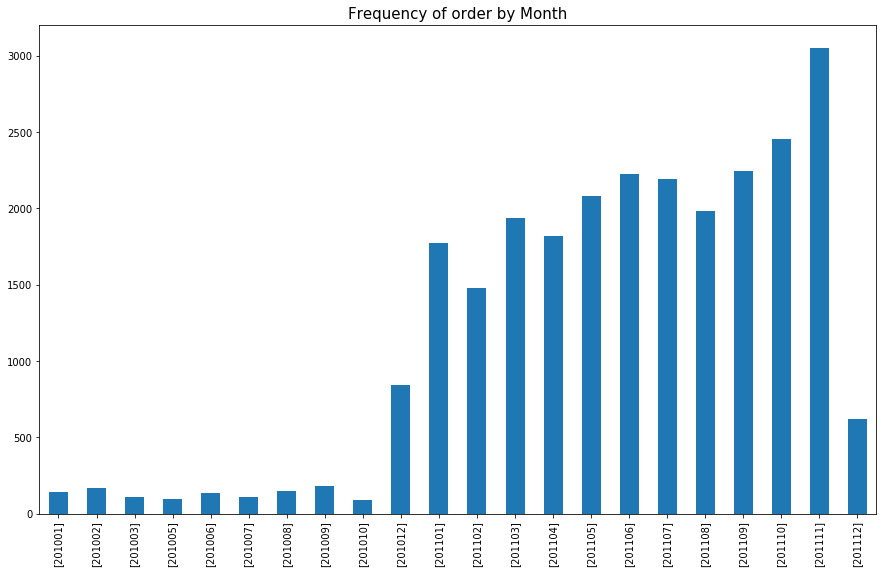

In [83]:
plt.figure(figsize=(15,9))
InvoiceMonth = ds.groupby(['InvoiceNo'])['Year_Month'].unique()
InvoiceMonth.value_counts().sort_index().plot.bar()

Invoices by Week

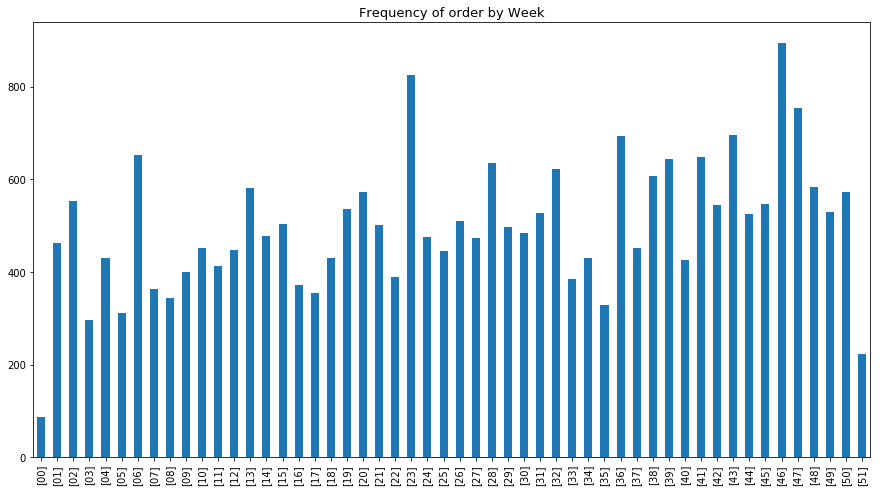

In [87]:
plt.figure(figsize=(15,8))
I = ds.groupby(['InvoiceNo'])['Week'].unique()
I.value_counts().sort_index().plot.bar()